### Problem Statement:
Leveraging the data given by Yulu for each hour of the shared electric cycles usage, 
Find out which variables are significant in predicting the demand for shared electric cycles in the Indian market and
How well those variables describe the electric cycle demands so that Yulu can understand the factors affecting the demands

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

In [2]:
#Loading the dataset
df = pd.read_csv("C:/Users/USER/Downloads/bike_sharing.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Checking the shape of dataset
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### Here we can see that datatime column's datatype is object so we can change it to datetime for ananlysis

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
#Adding some extra columns to get more insights
df["date"] = df["datetime"].dt.date
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month_name()
df["hour"] = df["datetime"].dt.hour
df["day"]=df["datetime"].dt.day_name()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  year        10886 non-null  int64         
 14  month       10886 non-null  object        
 15  hour        10886 non-null  int64         
 16  day         10886 non-

In [8]:
#Converting year into categorical columns
df['year'] = df['year'].astype('object')
df['hour'] = df['hour'].astype('object')

In [9]:
#Checking for missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
year          0
month         0
hour          0
day           0
dtype: int64

In [10]:
#Checking for unique values in each column
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
date            456
year              2
month            12
hour             24
day               7
dtype: int64

##### We can see that season, holiday , working day and weather can be treated as categorical columns. Further we can convert temperature, humidity and winspeed into categorical columns using bins to get more insights 

In [11]:
df['season'].replace([1,2,3,4],['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
df['holiday'].replace([1,0],['Yes', 'No'], inplace = True)
df['workingday'].replace([1,0], ['Yes','No'], inplace = True)
# Replacing weather:
# 1: Clear, Few clouds, partly cloudy, partly cloudy - with Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - with Cloudy
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - with Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog- With Heavy Rain
df['weather'].replace([1,2,3,4],['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'], inplace = True)

In [12]:
# Creating bins for temperature to change it into a categorical variable
bins = [0,15,25,35,45]
group = ['Low','Average','High','Very High']
df["temp_bin"] = pd.cut(df["temp"],bins,labels=group)

# Creating bins for windspeed to change it into a categorical variable
bins = [0,7,13,17,57]
group = ['Low','Average','High','Very High']
df["windspeed_bin"] = pd.cut(df["windspeed"],bins,labels=group)

# Creating bins for humidity to change it into a categorical variable
bins = [0,25,50,75,100]
group = ['Low','Average','High','Very High']
df["humidity_bin"] = pd.cut(df["humidity"],bins,labels=group)

In [13]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##### There is no measure difference in mean and median of temp, atemp, humidity and windspeed so there are less chances for these colums to contain outliers but there is significant difference in mean and median of count so it may contain outliers

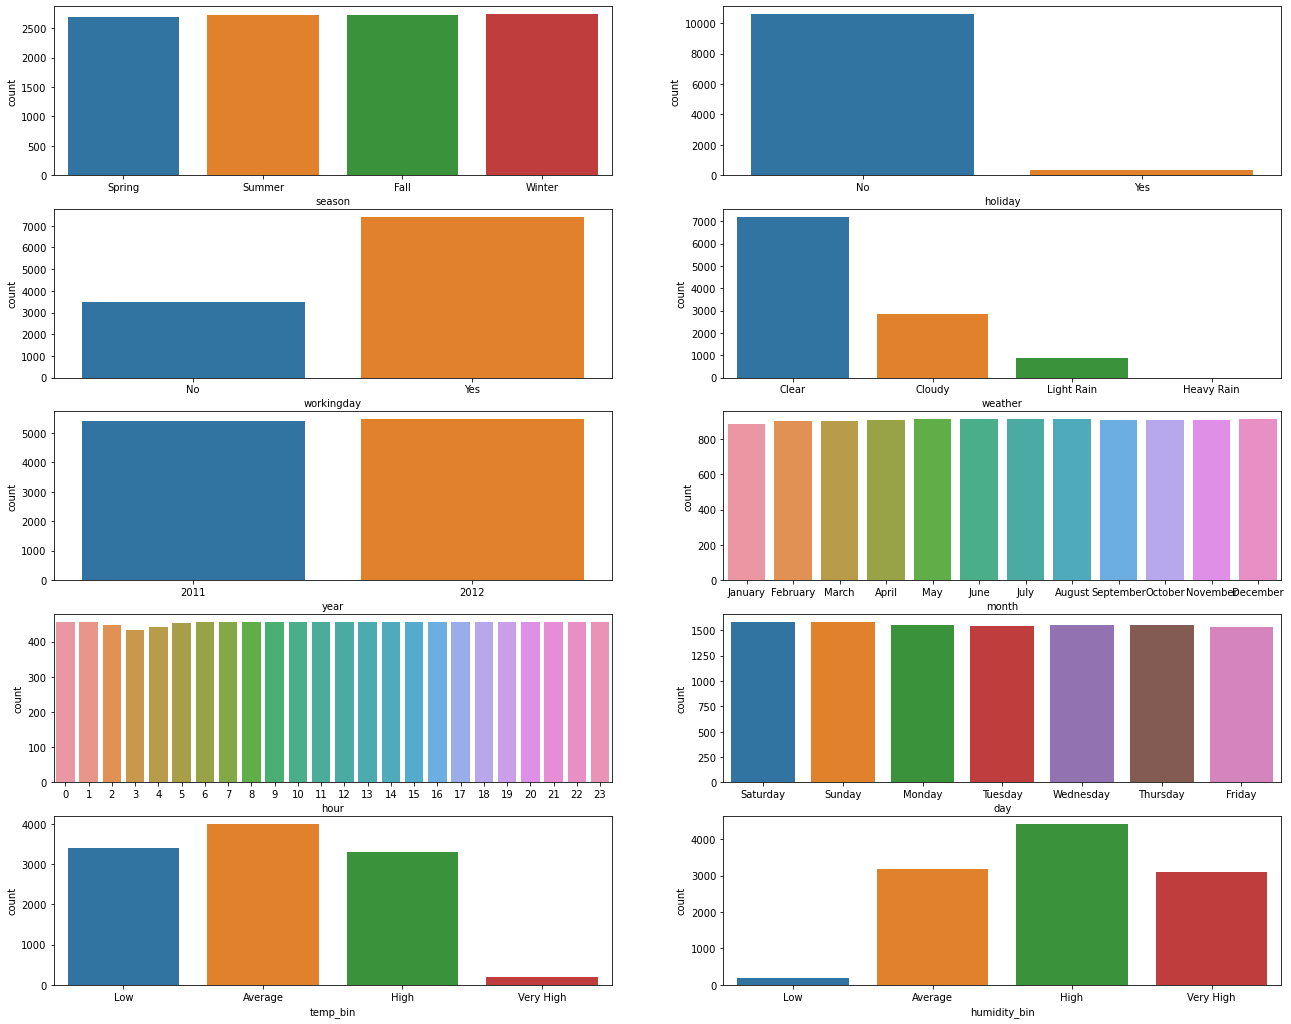

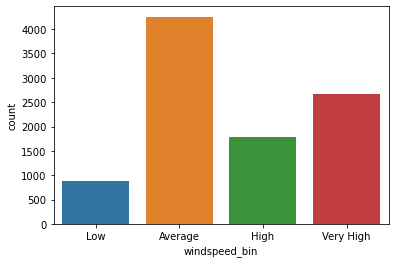

In [14]:
#Analysis of categorical columns by countplot
cat_cols = ['season','holiday','workingday', 'weather','year', 'month', 'hour', 'day', 'temp_bin', 'humidity_bin', 'windspeed_bin']
Fig, Axes = plt.subplots(nrows=5, ncols=2, figsize=(22,18))
k = 0
for i in range(5):
    for j in range(2):
        sns.countplot(data=df, x= cat_cols[k], ax=Axes[i,j])
        k += 1
plt.show()
sns.countplot(data=df, x= cat_cols[-1])
plt.show()

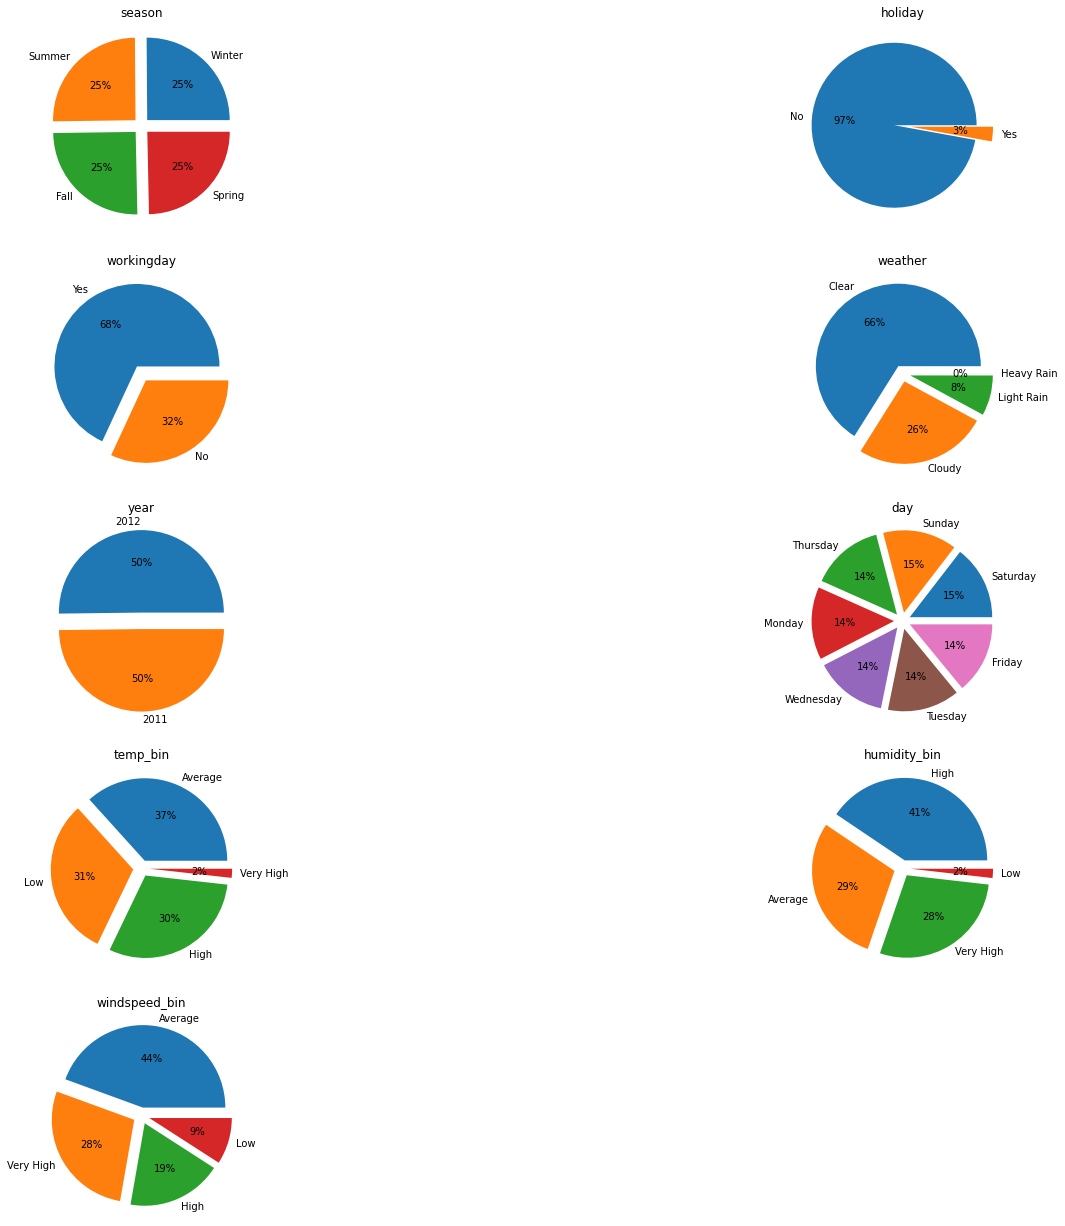

In [15]:
#Proportion analysis by pie chart of categorical columns
plt.figure(figsize = (25,22))
cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'day', 'temp_bin', 'humidity_bin', 'windspeed_bin']
k = 0
for i in range(9):
    plt.subplot(5, 2, i+1)
    data = df[cols[i]].value_counts(normalize=True)*100
    explode = [0.1]*len(data.index)
    plt.gca().title.set_text(cols[i])
    plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', explode= explode)
    k += 1

##### 1) There is equal no of data for each season i.e. 25% for each season
##### 2) Only 3% are holidays
##### 3) 68% days are working days
##### 4) 66% of times the weather is clear and 26% of times cloudy
##### 5) Equal data for both 2011 and 2012 years
##### 6) Almost equal data for all 7 days 
##### 7) 37% of times temperature is average(15-25 degree C) higher than other ranges
##### 8) Humidity is high(50-75) for most records 
##### 9) Windspeed is average(25-50) for most of the times

In [16]:
#Calculating proportion of registered and casual customers
round(df["registered"].sum()/df["count"].sum()*100,2)

81.2

##### There are 81.2% are registered customers and 18.8% are casual customers

### Outlier Detection

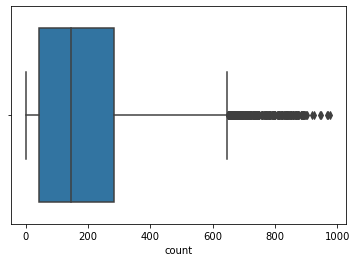

In [17]:
sns.boxplot(data= df, x = 'count')
plt.show()

##### We can clearly see there are outliers present in count

In [18]:
#Checking for percentage of outliers present in count
df_count = df['count']
q1 = np.percentile(df_count,25)
q3 = np.percentile(df_count,75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR
if lower < 0:
    lower = 0
length_excl_outliers = len(df[(df_count>lower)&(df_count<upper)])
print(f'{np.round((len(df_count)-length_excl_outliers)/len(df_count),3)}% outliers are present in count')

0.028% outliers are present in count


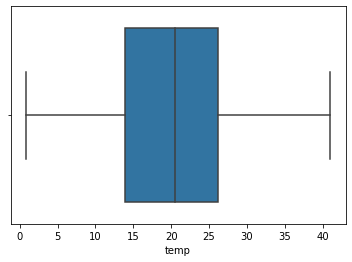

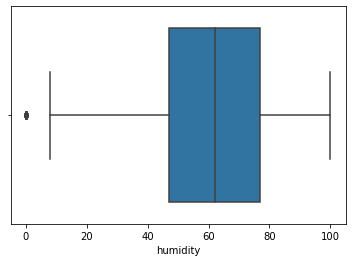

In [19]:
sns.boxplot(data=df, x = 'temp')
plt.show()
sns.boxplot(data=df, x = 'humidity')
plt.show()

##### As infered from describe, the boxplot confirms the same, temp and humidity aren't containing significant outliers

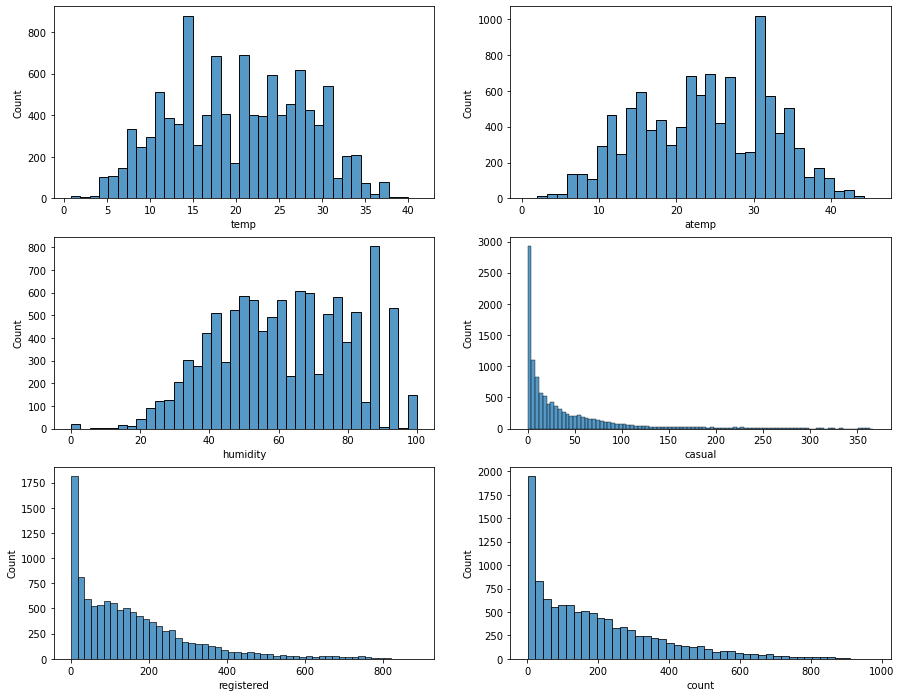

In [20]:
num_cols = ['temp','atemp','humidity','casual', 'registered', 'count']
Fig, Axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
k = 0
for i in range(3):
    for j in range(2):
        sns.histplot(data=df, x= num_cols[k], ax=Axes[i,j])
        k += 1
plt.show()

##### We can see that data is heavily right skewed so need to be tranformed for hypothesis testing

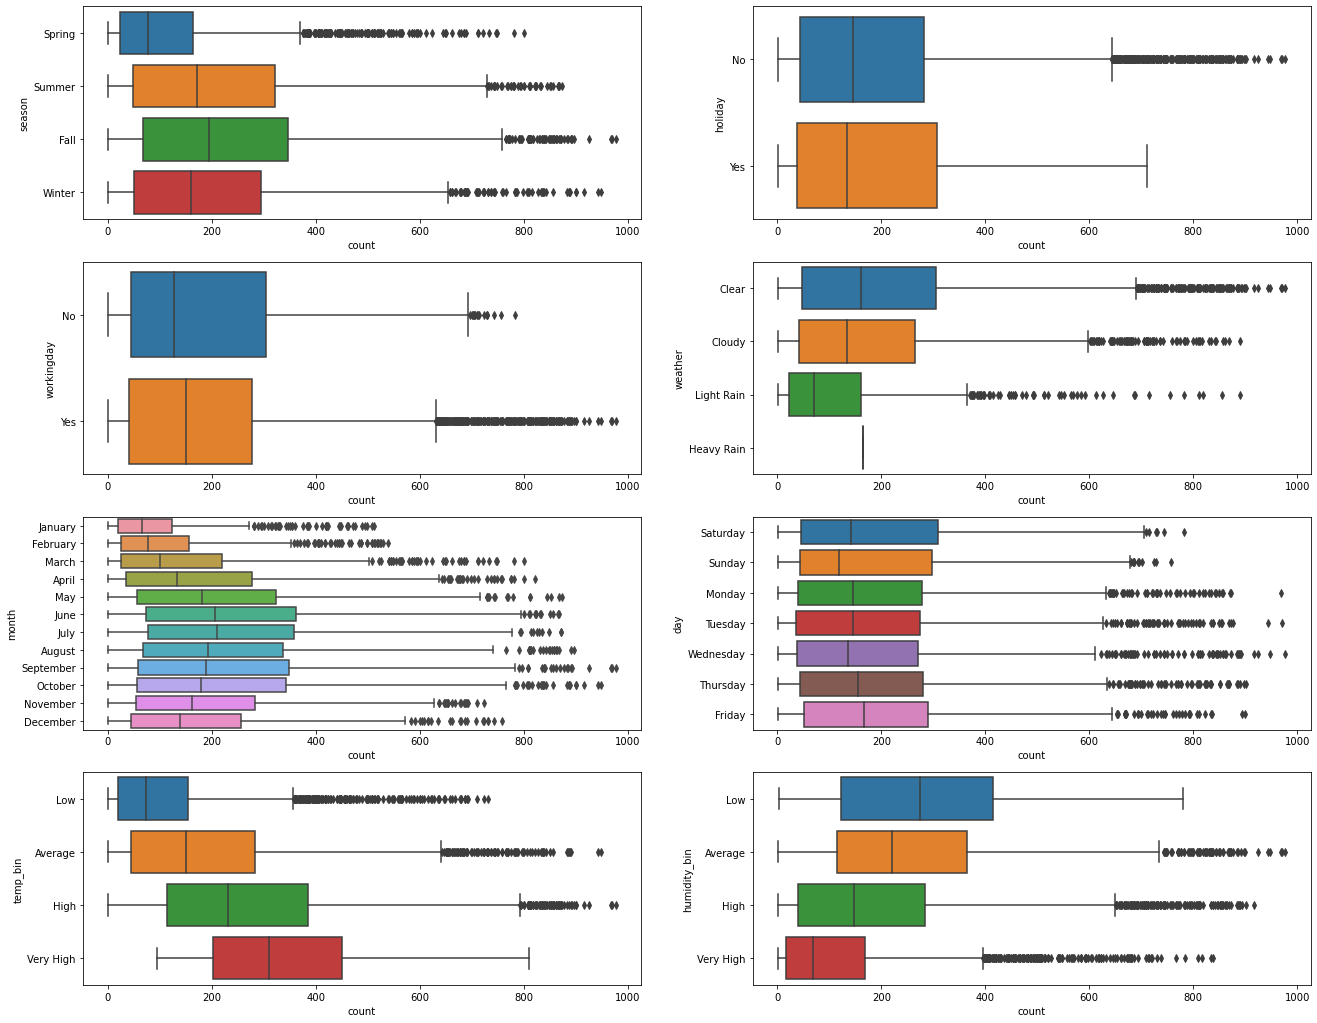

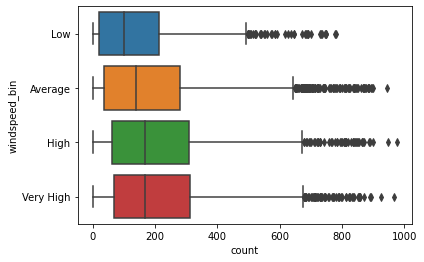

In [21]:
#Analysis of categorical columns by boxplot
cat_cols = ['season','holiday','workingday', 'weather','month', 'day', 'temp_bin', 'humidity_bin', 'windspeed_bin']
Fig, Axes = plt.subplots(nrows=4, ncols=2, figsize=(22,18))
k = 0
for i in range(4):
    for j in range(2):
        sns.boxplot(data=df, y= cat_cols[k], x = 'count', ax=Axes[i,j])
        k += 1
plt.show()
sns.boxplot(data=df, y= cat_cols[-1], x = 'count')
plt.show()

##### From the median in boxplot we can infer that:
##### (i) In the season of summer and fall, total count of rented cycles is more than other seasons
##### (ii) As expected, total count of rented cycles is more in clear weather
##### (iii) There are no of rented cycles in the month of June and July compare to other months
##### (iv) Count of Rented cycles is more on working days
##### (v) On friday, total count of rented cycles is slighty higher than other days
##### (vi) Median for number of rented cycle for very high temperature bin, low humidity bin and high, very high windspeed bin are higher than other bins in same category


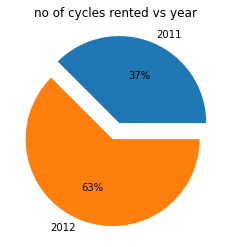

In [22]:
#Analysing the no of cycles rented per year
df_per_year = df.groupby('year')['count'].sum()
explode = [0.1]*len(df_per_year.index)
plt.title('no of cycles rented vs year')
plt.pie(x=df_per_year.values, labels=df_per_year.index, autopct='%.0f%%', explode= explode)
plt.show()

##### We can see the significant increase in demand from 2011 to 2012.  No of cycles rented has almost doubled in 2012 compare to 2011

In [23]:
#Analysing cycles rented per hour
df_per_hour_count = df.groupby('hour')['count'].sum().reset_index()
df_per_hour_count.sort_values(by = 'count', ascending = False, ignore_index= True)

,hour,count
0,17,213757
1,18,196472
2,8,165060
3,16,144266
4,19,143767
5,13,117551
6,12,116968
7,15,115960
8,14,111010
9,20,104204


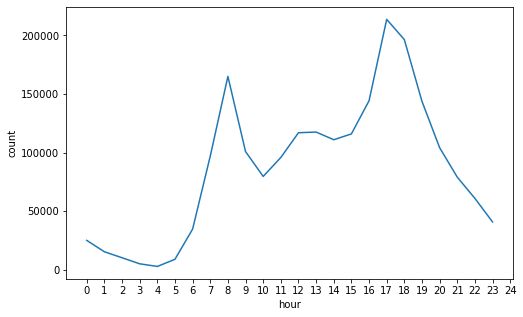

In [24]:
#Visual analysis of no of cycles rented per hour
plt.figure(figsize = (8,5))
sns.lineplot(data = df_per_hour_count, x='hour', y='count')
plt.xticks(range(0,25,1))
plt.show()

##### We can see that rented cycles count peaks between 8-9 hours and 17-19 hours so users mostly are using rented cycles for work commute

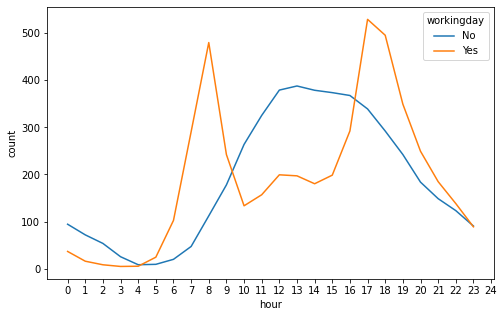

In [25]:
df_per_hour_count = df.groupby(['hour', 'workingday'])['count'].mean().reset_index()
plt.figure(figsize = (8,5))
sns.lineplot(data = df_per_hour_count, x='hour', y='count', hue = 'workingday')
plt.xticks(range(0,25,1))
plt.show()

##### We can see that avg no of rented cycles peaks at work commute hours on working days but for non working days, it's opposite

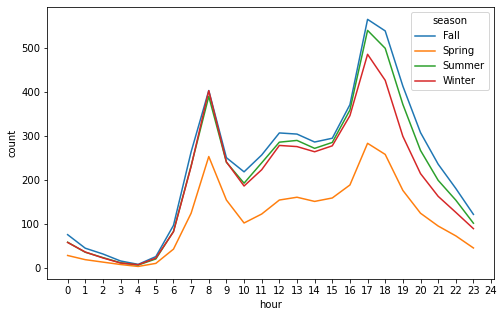

In [26]:
df_per_hour_count = df.groupby(['hour', 'season'])['count'].mean().reset_index()
plt.figure(figsize = (8,5))
sns.lineplot(data = df_per_hour_count, x='hour', y='count', hue = 'season')
plt.xticks(range(0,25,1))
plt.show()

##### Here we can see the similar trend for cycles rented in all season

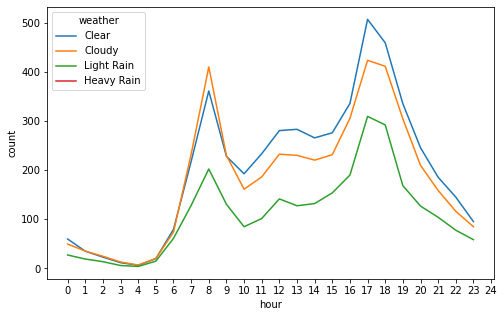

In [27]:
df_per_hour_count = df.groupby(['hour', 'weather'])['count'].mean().reset_index()
plt.figure(figsize = (8,5))
sns.lineplot(data = df_per_hour_count, x='hour', y='count', hue = 'weather')
plt.xticks(range(0,25,1))
plt.show()

##### Here also we can see the similar trend for cycles rented in all weathers

In [28]:
df_per_month = df.groupby('month')['count'].sum().reset_index()
df_per_month.sort_values(by = 'count', ascending = False, ignore_index= True)

,month,count
0,June,220733
1,July,214617
2,August,213516
3,September,212529
4,October,207434
5,May,200147
6,November,176440
7,April,167402
8,December,160160
9,March,133501


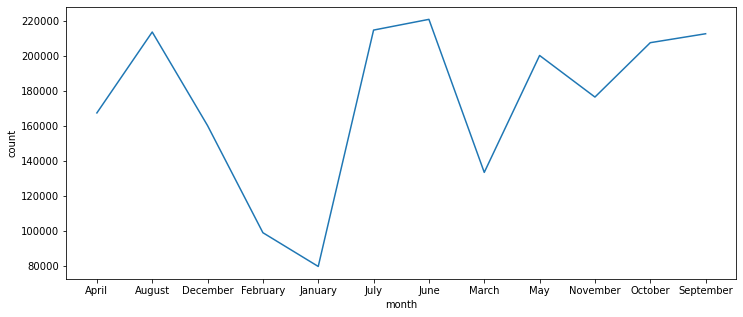

In [29]:
#Visual analysis of no of cycles rented per hour
plt.figure(figsize = (12,5))
sns.lineplot(data = df_per_month, x='month', y='count')
plt.show()

##### We can see that no of rented cycles are higher in the month of june, july and august

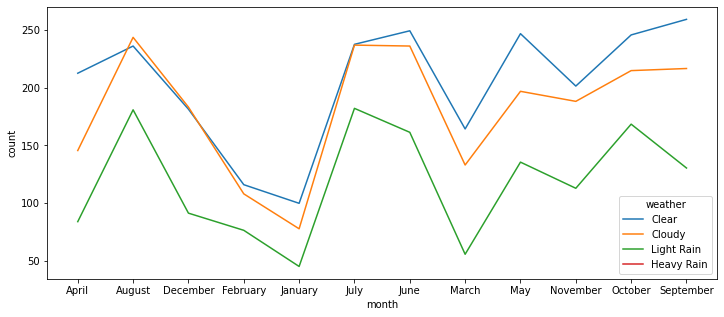

In [30]:
df_per_month = df.groupby(['month', 'weather'])['count'].mean().reset_index()
plt.figure(figsize = (12,5))
sns.lineplot(data = df_per_month, x='month', y='count', hue = 'weather')
plt.show()

##### We can see the same kind of trend in all weathers for every month

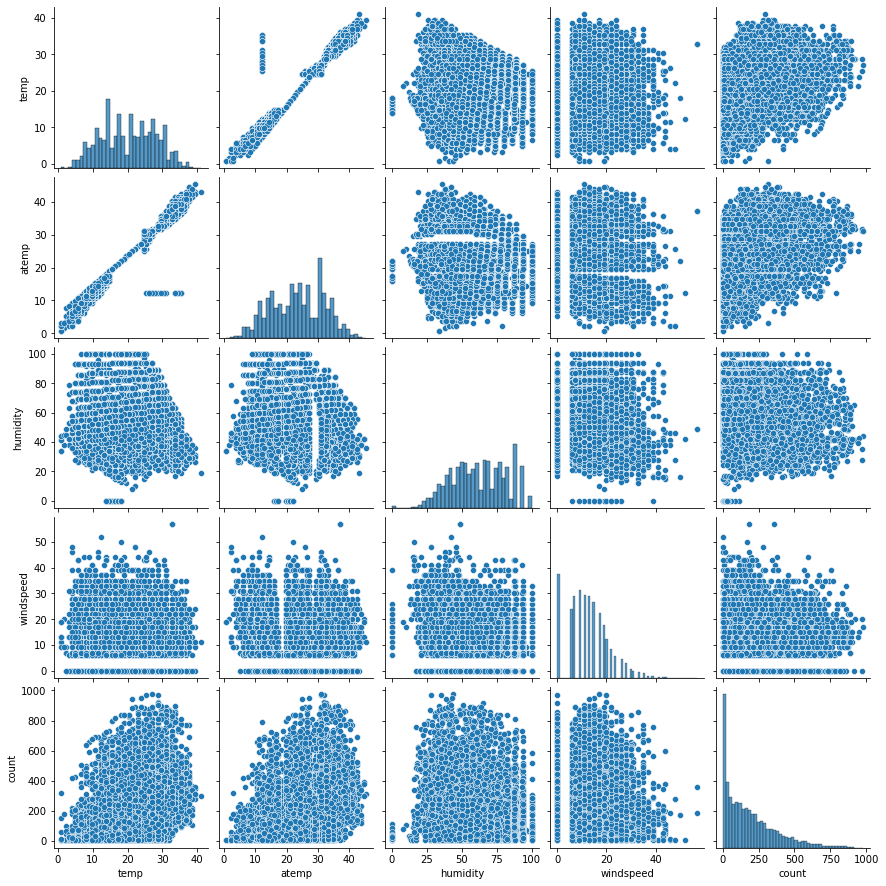

In [31]:
sns.pairplot(df, vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

#### Correlation Metrix 

In [32]:
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


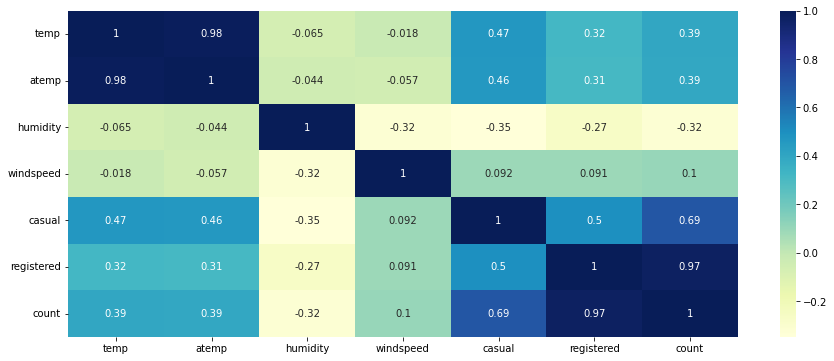

In [33]:
# Correlation Plot above of as a Heatmap -
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

##### We can see than correlation coefficient of nos of rented cycles with temp is 0.39, with humdity is -0.32 and with windspeed is 0.1
##### Count is negatively correlated with humidity so an increase in humidity may reduce the nos of rented cycles

### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

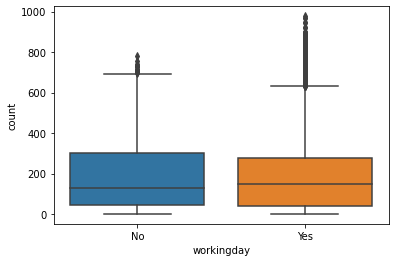

In [34]:
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.show()

##### From the above box plots, there seems to be no significant difference in no of cycles rented on working days and non working days but will check it stastically by hypothesis testing

##### Hypothesis:
###### H0: Avg nos of rented cycles on working days = Avg nos of rented cycles on non-working days                                        
###### Ha: Avg nos of rented cycles on working days != Avg nos of rented cycles on non-working days

In [35]:
working_day = df[df['workingday']== 'Yes']['count']
non_working_day = df[df['workingday']== 'No']['count']

In [36]:
len(working_day), len(non_working_day)

(7412, 3474)

##### Checking if the assumptions are met for 2 sample T-test

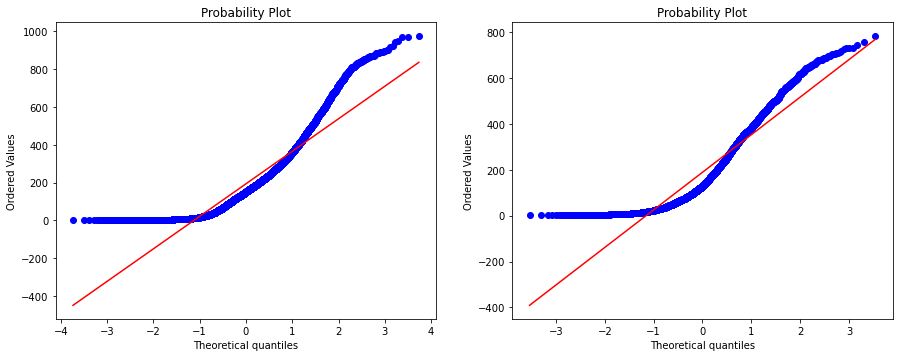

In [37]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(working_day, dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(non_working_day, dist=stats.norm, plot=ax2)
plt.show()

##### We can see that both variables are not following normal distribution

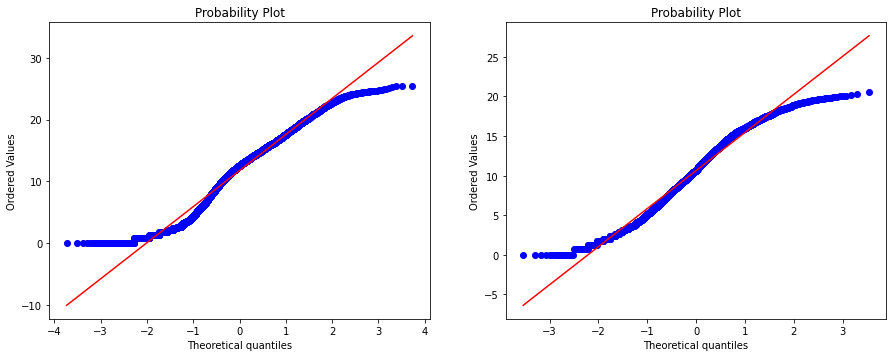

In [38]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(working_day)[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(non_working_day)[0], dist=stats.norm, plot=ax2)
plt.show()

##### We can see that dataset for working and non working day not exactly follows the normal distribution even after applying boxcox transformation

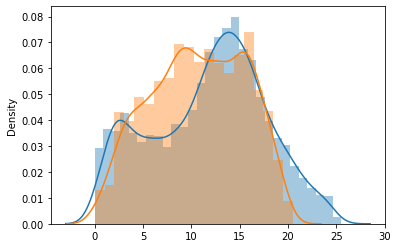

In [39]:
sns.distplot(stats.boxcox(working_day)[0])
sns.distplot(stats.boxcox(non_working_day)[0])
plt.show()

##### We can see there is difference in variance between both datasets
##### So here assumptions are not met for 2 sample t test . Even after applying boxcox transformation the variable are not normally distributed so proceeding with t-test

In [40]:
#performing t-test
ttest_ind(working_day, non_working_day)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

##### We can see that pvalue > 0.05 
##### so we failed to reject the null hypothesis
##### Avg nos of rented cycles on working days is equal to avg nos of rented cycles on non-working days

### ANNOVA to check if No. of cycles rented is similar or different in different weather

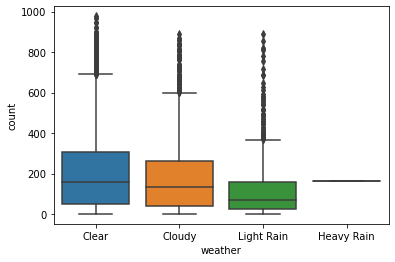

In [41]:
sns.boxplot(x='weather', y='count', data = df)
plt.show()

##### From the above boxplot, it seems that no. of cycles rented is different for each weather but we will check it statistically by hypothesis testing

##### Hypothesis:
##### H0: No. of cycles rented is similar in different weather
##### Ha: No. of cycles rented is different in different weather

In [42]:
a = df[df['weather'] == 'Clear']['count']
b = df[df['weather'] == 'Cloudy']['count']
c = df[df['weather'] == 'Heavy Rain']['count']
d = df[df['weather'] == 'Light Rain']['count']

In [43]:
len(a),len(b),len(c),len(d)

(7192, 2834, 1, 859)

##### We can see there is only one data point for heavy rain weather 

In [44]:
a.mean(), b.mean(), c.mean(), d.mean()

(205.23679087875416, 178.95553987297106, 164.0, 118.84633294528521)

##### Checking if the assumptions are met to apply Anova 

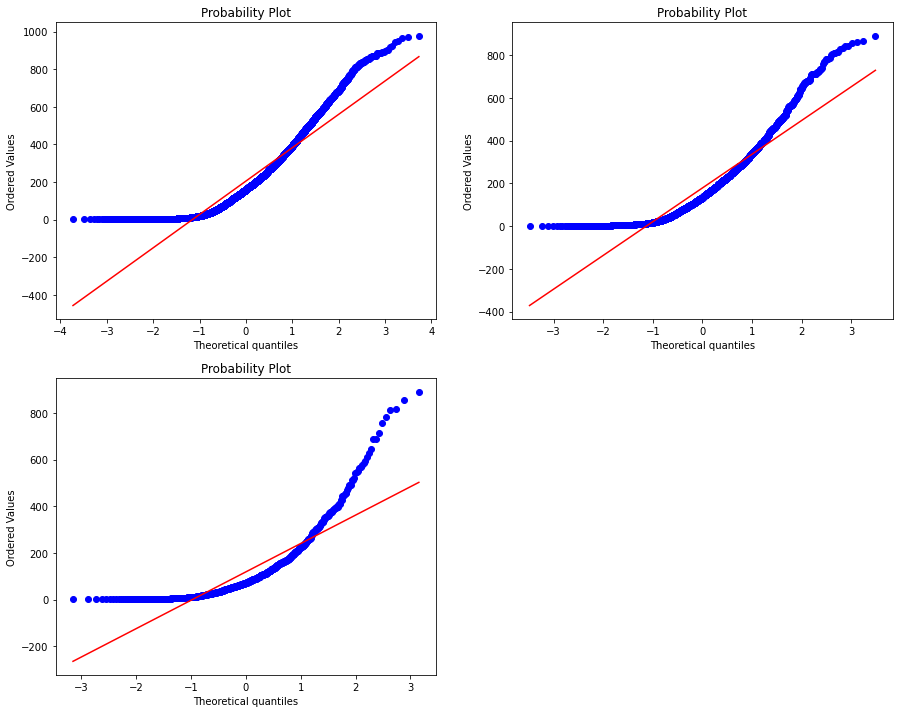

In [45]:
# Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(a, dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(b, dist=stats.norm, plot=ax2)
ax3 = fig.add_subplot(223)
stats.probplot(d, dist=stats.norm, plot=ax3)
plt.show()

##### We can see from the above plots that three variables are not following normal distribution

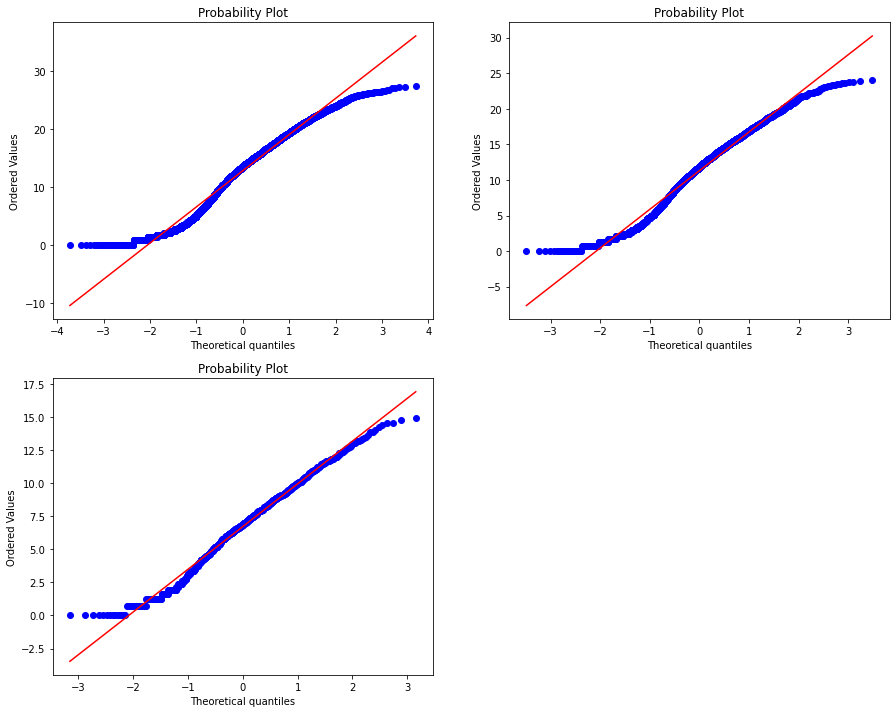

In [46]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(a)[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(b)[0], dist=stats.norm, plot=ax2)
ax3 = fig.add_subplot(223)
stats.probplot(stats.boxcox(d)[0], dist=stats.norm, plot=ax3)
plt.show()

##### We can see that all variable are not exactly normally distributed even after applying boxcox transformation

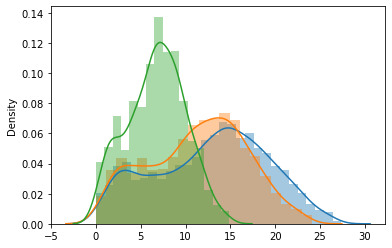

In [47]:
sns.distplot(stats.boxcox(a)[0])
sns.distplot(stats.boxcox(b)[0])
sns.distplot(stats.boxcox(d)[0])
plt.show()

##### There is difference between variances of different weathers as well

##### So here assumptions are not met for Anova test . Even after applying boxcox transformation the variable are not normally distributed so proceeding with anova test

#### Applying Anova test

In [48]:
f_oneway(a,b,c,d)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so no. of cycles rented are different in different weather

### ANNOVA to check if No. of cycles rented is similar or different in different season

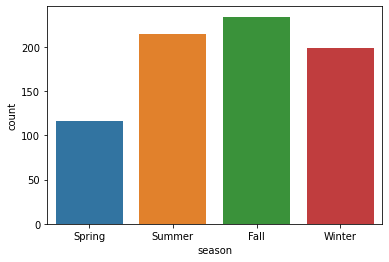

In [49]:
#Visual analysis of season vs no of cycles rented
sns.barplot(x='season', y = 'count', data = df, ci=None)
plt.show()

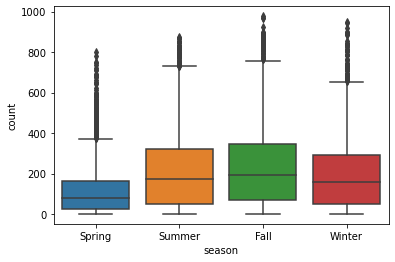

In [50]:
sns.boxplot(x='season', y='count', data = df)
plt.show()

##### We can see there is difference between no of cycles rented in each season but we will check it statstically by hypothesis testing

##### Hypothesis:
##### H0: No. of cycles rented is similar in different season
##### Ha: No. of cycles rented is different in different season

In [51]:
a = df[df['season'] == 'Fall']['count']
b = df[df['season'] == 'Spring']['count']
c = df[df['season'] == 'Summer']['count']
d = df[df['season'] == 'Winter']['count']

In [52]:
len(a), len(b), len(c), len(d)

(2733, 2686, 2733, 2734)

In [53]:
a.mean(), b.mean(), c.mean(), d.mean()

(234.417124039517, 116.34326135517499, 215.25137211855105, 198.98829553767374)

##### Checking if the assumptions are met to apply Anova

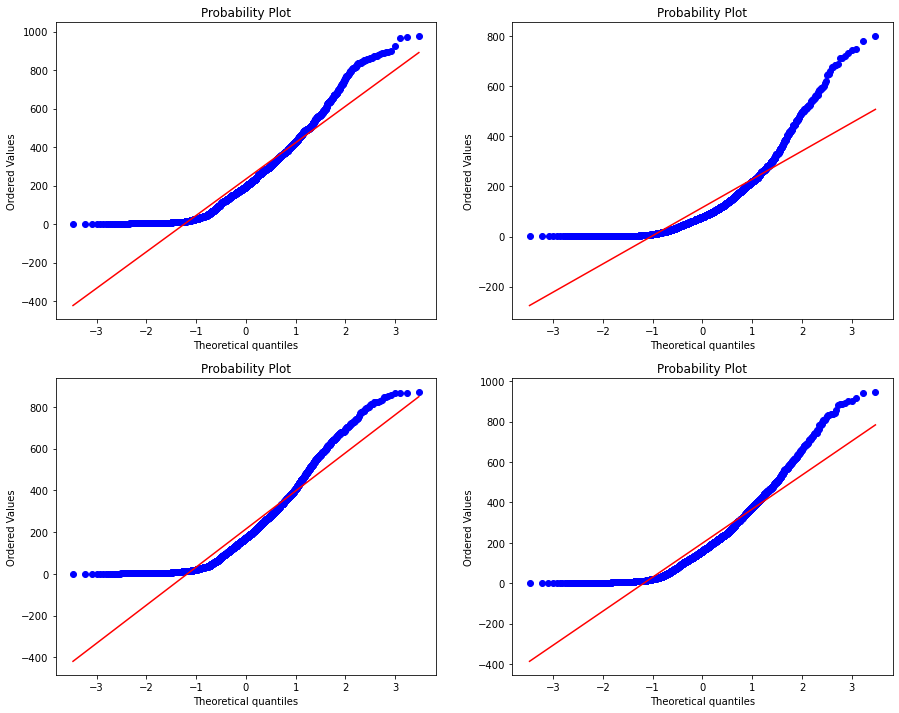

In [54]:
# Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(a, dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(b, dist=stats.norm, plot=ax2)
ax3 = fig.add_subplot(223)
stats.probplot(c, dist=stats.norm, plot=ax3)
ax4 = fig.add_subplot(224)
stats.probplot(d, dist=stats.norm, plot=ax4)
plt.show()

##### We can see that all 4 variables are not following normal distribution

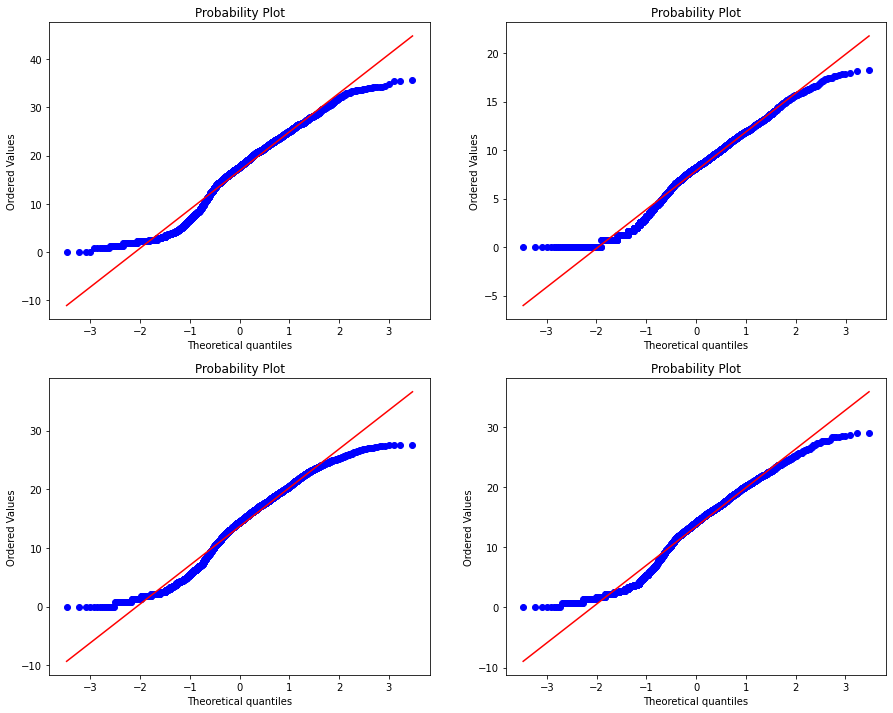

In [55]:
# Checking for normal distribution after applying boxcox distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(a)[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(b)[0], dist=stats.norm, plot=ax2)
ax3 = fig.add_subplot(223)
stats.probplot(stats.boxcox(c)[0], dist=stats.norm, plot=ax3)
ax4 = fig.add_subplot(224)
stats.probplot(stats.boxcox(d)[0], dist=stats.norm, plot=ax4)
plt.show()

##### From the above plots, we can say that all 4 attributes do not exactly follow normal distribution

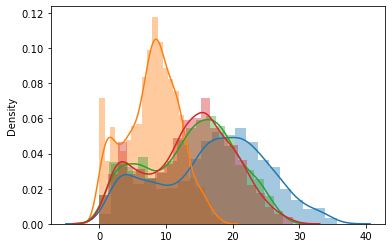

In [56]:
sns.distplot(stats.boxcox(a)[0])
sns.distplot(stats.boxcox(b)[0])
sns.distplot(stats.boxcox(c)[0])
sns.distplot(stats.boxcox(d)[0])
plt.show()

##### There is some difference in varriance between all seasons

##### So here assumptions are not met for Anova test . Even after applying boxcox transformation the variable are not normally distributed so proceeding with anova test

#### Applying Anova test

In [57]:
f_oneway(a,b,c,d)

F_onewayResult(statistic=236.94671081032115, pvalue=6.164843386499654e-149)

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so no. of cycles rented are different in different season

### Chi-square test to check if Weather is dependent on the season

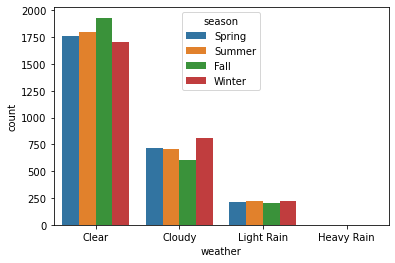

In [58]:
sns.countplot(x = 'weather', hue ='season', data = df)
plt.show()

##### Hypothesis:
##### H0: Weather and Season are independent
##### Ha: Statistically Significant Relationship b/w Weather and Season

In [59]:
weather_season = pd.crosstab(index=df["weather"], 
                            columns=df["season"])
weather_season

season,Fall,Spring,Summer,Winter
weather,,,,
Clear,1930,1759,1801,1702
Cloudy,604,715,708,807
Heavy Rain,0,1,0,0
Light Rain,199,211,224,225


##### We can see that heavy rain only has one datapoint so we can remove that

In [60]:
weather_season = pd.crosstab(index=df[df["weather"] != 'Heavy Rain']['weather'], 
                             columns=df["season"])
weather_season

season,Fall,Spring,Summer,Winter
weather,,,,
Clear,1930,1759,1801,1702
Cloudy,604,715,708,807
Light Rain,199,211,224,225


In [61]:
chi2_contingency(weather_season) # chi stat, p-value, df, expected freq

(46.101457310732485,
 2.8260014509929403e-08,
 6,
 array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
        [ 711.55920992,  699.06201194,  711.55920992,  711.81956821],
        [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823]]))

##### Checking if the assumptions are met for chi-square test

In [62]:
expected_freq = chi2_contingency(weather_season)[3]
expected_freq

array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
       [ 711.55920992,  699.06201194,  711.55920992,  711.81956821],
       [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823]])

##### Here we can see  that expected frequency in all cells in above array is greater than 5. Both variables are categorical and all observations are indenpendent 
##### So all assumptions are met for chi square test

In [63]:
p_value = chi2_contingency(weather_season)[1]
p_value

2.8260014509929403e-08

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so there is statistically significant relationship b/w Weather and Season

### Chi-square test to check if Weather is dependent on the temperature 

###### Hypothesis:
###### H0: Weather and temperature are independent
###### Ha: Statistically Significant Relationship b/w Weather and temperature

In [64]:
weather_temp = pd.crosstab(index=df["weather"], 
                            columns=df["temp_bin"])
weather_temp

temp_bin,Low,Average,High,Very High
weather,,,,
Clear,2210,2473,2338,171
Cloudy,927,1127,760,20
Heavy Rain,1,0,0,0
Light Rain,255,395,207,2


##### Heavy rain has only one data point so removing it

In [65]:
weather_temp = pd.crosstab(index=df[df["weather"] != 'Heavy Rain']['weather'], 
                             columns=df["temp_bin"])
weather_temp

temp_bin,Low,Average,High,Very High
weather,,,,
Clear,2210,2473,2338,171
Cloudy,927,1127,760,20
Light Rain,255,395,207,2


In [66]:
chi2_contingency(weather_temp)

(119.41710162020222,
 2.1601972981392316e-23,
 6,
 array([[2241.18180983, 2639.59944878, 2183.69866789,  127.5200735 ],
        [ 883.13532384, 1040.13137345,  860.4841525 ,   50.24915021],
        [ 267.68286633,  315.26917777,  260.8171796 ,   15.2307763 ]]))

In [67]:
p_value = chi2_contingency(weather_temp)[1]
p_value

2.1601972981392316e-23

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so there is statistically significant relationship b/w Weather and temperature

### Chi-square test to check if humidity is dependent on season

In [68]:
season_humidity = pd.crosstab(index=df["season"], 
                            columns=df["humidity_bin"])
season_humidity

humidity_bin,Low,Average,High,Very High
season,,,,
Fall,18,612,1335,768
Spring,78,1104,948,534
Summer,93,829,988,823
Winter,7,625,1136,966


In [69]:
chi2_contingency(season_humidity)

(523.3618567246025,
 5.699018665120489e-107,
 9,
 array([[  49.30670103,  797.46041973, 1108.64607879,  777.58680044],
        [  48.06185567,  777.3269514 , 1080.65611193,  757.955081  ],
        [  49.30670103,  797.46041973, 1108.64607879,  777.58680044],
        [  49.32474227,  797.75220913, 1109.05173049,  777.87131811]]))

In [70]:
p_value = chi2_contingency(season_humidity)[1]
p_value

5.699018665120489e-107

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so there is statistically significant relationship b/w season and humidity

### Chi-square test to check if humidity is dependent on weather

In [71]:
weather_humidity = pd.crosstab(index=df[df["weather"] != 'Heavy Rain']['weather'], 
                             columns=df["humidity_bin"])
weather_humidity

humidity_bin,Low,Average,High,Very High
weather,,,,
Clear,186,2681,3051,1274
Cloudy,10,465,1199,1158
Light Rain,0,24,157,658


In [72]:
chi2_contingency(weather_humidity)

(1880.5941115568676,
 0.0,
 6,
 array([[ 129.76452177, 2098.74252048, 2917.71554819, 2045.77740956],
        [  51.09748688,  826.42363988, 1148.91135046,  805.56752278],
        [  15.13799135,  244.83383964,  340.37310135,  238.65506766]]))

In [73]:
p_value = chi2_contingency(weather_humidity)[1]
p_value

0.0

##### We can see that P value is zero so less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so there is statistically significant relationship b/w weather and humidity

### ANNOVA to check if No. of cycles rented is similar or different in different windspeed

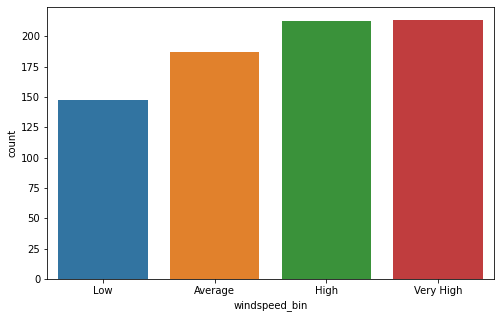

In [74]:
#Visual analysis of windspeed vs no of cycles rented
plt.figure(figsize = (8,5))
sns.barplot(data = df, x='windspeed_bin', y='count', ci = None )
plt.show()

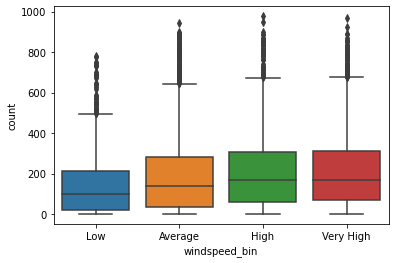

In [75]:
#Visual analysis of windspeed vs no of cycles rented
sns.boxplot(x = 'windspeed_bin', y = 'count', data = df)
plt.show()

##### Hypothesis:
##### H0: No. of cycles rented is similar in different windspeed
##### Ha: No. of cycles rented is different in different windspeed

In [76]:
a = df[df['windspeed_bin'] == 'Low']['count']
b = df[df['windspeed_bin'] == 'Average']['count']
c = df[df['windspeed_bin'] == 'High']['count']
d = df[df['windspeed_bin'] == 'Very High']['count']

In [77]:
#Applying Anova test
f_oneway(a,b,c,d)

F_onewayResult(statistic=37.13587444934186, pvalue=7.492904400362234e-24)

##### We can see that P value is very low and less than 0.05
##### if alpha = 0.05, confidence = 95%
##### We reject the null hypothesis so no. of cycles rented are different in different windspeed